# Introduction

Here we first look how AB and ABi formation changes with time across different Bi0. Then we look at how the time taken to reach 90% of maximum possible AB changes with Bi0

In [6]:
# import random
import json
import os

param_json_dir = './param_jsons/'
out_put_dir = './output_jsons/'

In [7]:
def save_json_params(Bi,file_name):
    
    # dissociation constant
    Kd = 1e-6
    Kdi = 1e-1
    # splitting dissociation constant to rate constants
    kf,kr = 1,Kd
    kfi,kri = 1,Kdi
    # starting states of reactants
    reactant_state = {'A':500,'B':500,'AB':0,'Bi':Bi,'ABi':0} # starting states
    # reactants list
    reactants_list = [['A','B'],['AB'],['A','Bi'],['ABi']] ## for 2A it must be ['A','A']
    # crrosponding product list
    product_list = [['AB'],['A','B'],['ABi'],['A','Bi']]
    # crrosponding rate constant list
    rate_constant_list = [kf,kr,kfi,kri]

    # save parameter file
    with open(file_name,'w') as inf:
        json.dump((rate_constant_list,reactants_list,product_list,reactant_state),inf)

def plot_products(n_iter,xcrop,ycrop,file_name,out_dir):
    # plotting a simulation and its replicates with matplotlib package
    import matplotlib.pyplot as plt
    # intiate figure
    plt.figure(figsize=(4,2))
    plt.xlim(-1*(xcrop/50),xcrop+1*(xcrop/50))
    plt.ylim(-1*(ycrop/50),ycrop+1*(ycrop/50))

    base_name = os.path.basename(file_name)
    for i in range(n_iter-1):
        # open and read a replicate fo the simulation
        res_file = out_dir+'/'+base_name+'_rep_'+str(i)+'_out.json'
        with open(res_file) as inf:            
            time,reactants = json.load(inf)
        # save trajectories of required chemical entities
        AB = reactants['AB']
        ABi = reactants['ABi']  
        # plot
        plt.plot(time,AB,c='Blue')
        plt.plot(time,ABi,c='Red')  

    res_file = out_dir+'/'+base_name+'_rep_'+str(n_iter-1)+'_out.json'
    with open(res_file) as inf:            
        time,reactants = json.load(inf)
    AB = reactants['AB']
    ABi = reactants['ABi']

    # plotting the last one seperately for legends
    plt.plot(time,AB,c='Blue',label='AB')
    plt.plot(time,ABi,c='Red',label='ABi')  

    # x and y label
    plt.xlabel('Time(s)')
    plt.ylabel('Number of molecules')
    plt.legend(loc=1)
    return plt


## Bi = 1000

In [9]:
iter_list = []
Bi = 1000

# writing paramter file
file_name = param_json_dir+'/example_parameter.json'
save_json_params(Bi,file_name)

In [10]:
# Reading simulation trajectory from output json file
# Rhe example simulation was simulated for 1000 seconds with maximum iteration of 1,000,000

# output file names 
replicate1 = out_put_dir+'/example_parameter.json_rep_0_out.json'
replicate2 = out_put_dir+'/example_parameter.json_rep_1_out.json'

# reading replicate 1
with open(replicate1) as inf:            
    time1,reactants1 = json.load(inf)

# reading replicate 2
with open(replicate2) as inf:            
    time2,reactants2 = json.load(inf)

# Here time is a list of time points corresponding to each reaction
# reactant is a dictionary where the key in the name of the chemical entity (example 'AB') and value is a list that shows the value of the chemical entity at each time point.

Text(0.5, 1.0, 'Products vs time (Bi0 = 1000)')

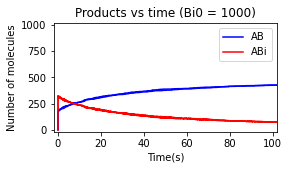

In [11]:
# example of plotting

# crop values for x and y axis
xcrop = 100
ycrop = 1000

# plotting the files filenames and directory are formated automatically based on input file name
plt = plot_products(2,xcrop,ycrop,file_name,out_put_dir)
# adding title to plot
title = 'Products vs time'
plt.title(title+' (Bi0 = '+str(Bi)+')')